# Convolutional Neural Network (CNN)

## 1. CNN là gì?

CNN (Convolutional Neural Network) là một loại mạng nơ-ron nhân tạo giúp máy tính "nhìn" và hiểu ảnh, tương tự cách con người nhận diện vật thể trong đời thực. Thay vì xem toàn bộ ảnh một lúc như mạng nơ-ron thông thường (fully connected), CNN chia nhỏ ảnh ra, tìm các đặc trưng như đường thẳng, góc, vòng tròn, rồi ghép lại để đoán xem ảnh đó là gì.

**Ví dụ**: Khi ta nhìn một con mèo, không cần xem hết cả ảnh ngay lập tức. Ta nhận ra tai mèo (hình tam giác), mắt mèo (hình tròn), ria mèo (đường thẳng), rồi kết luận "Đây là mèo". CNN cũng làm như vậy bằng cách dùng các "kính lúp" nhỏ quét qua ảnh từng phần một.

**Ví dụ cụ thể**: Hãy tưởng tượng chúng ta có một ảnh số "7". CNN sẽ tìm đường ngang ở trên cùng và đường chéo bên dưới để nhận ra đó là số "7".

## 2. Các thành phần chính của CNN

### 2.1. Tầng tích chập (Convolution Layer)

Đây là bước quan trọng nhất, giống như "đôi mắt" của CNN, giúp tìm các đặc trưng nhỏ trong ảnh như cạnh, góc, hoặc đường cong.

#### Ý tưởng cơ bản
- Chúng ta có một ảnh, giả sử kích thước là $6 \times 6$ pixel.
- Dùng một **bộ lọc** (filter/kernel), ví dụ $3 \times 3$, như một "kính lúp" nhỏ để quét qua ảnh.
- Kết quả là một **feature map** (bản đồ đặc trưng), cho biết chỗ nào trong ảnh có đặc trưng mà bộ lọc tìm được.

#### Công thức tích chập
Công thức toán học của tích chập là:

$$ S(i, j) = \sum_{m=0}^{F-1} \sum_{n=0}^{F-1} I(i+m, j+n) \cdot K(m, n) $$

- $I$: Ảnh đầu vào (input image).
- $K$: Bộ lọc (kernel/filter).
- $F$: Kích thước bộ lọc (ví dụ $F=3$ nếu là $3 \times 3$).
- $S(i, j)$: Giá trị tại vị trí $(i, j)$ trong feature map.

**Giải thích đơn giản**: Lấy từng vùng nhỏ của ảnh (cùng kích thước với bộ lọc), nhân từng số trong vùng với số tương ứng trong bộ lọc, rồi cộng tất cả lại để ra một số mới.

#### Minh họa Tích chập với Số "0"

Hãy cùng khám phá cách tầng tích chập hoạt động qua một ví dụ thú vị: nhận diện số "0"! Chúng ta sẽ dùng một bộ lọc để tìm các đường biên, làm nổi bật những nét đặc trưng của số "0".

**Ảnh đầu vào**

Ảnh đầu vào là ma trận nhị phân $6 \times 6$, biểu diễn số "0":

$$ I = \begin{bmatrix} 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 & 1 & 0 \\ 0 & 1 & 1 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 1 & 1 \\ 0 & 0 & 0 & 1 & 0 & 1 \end{bmatrix} $$

- Số **1**: Nét vẽ của số "0".
- Số **0**: Nền trắng.

**Bộ lọc phát hiện đường biên**

Chúng ta dùng bộ lọc $K$ kích thước $3 \times 3$, được thiết kế để phát hiện đường biên:

$$ K = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$


**Tính toán Feature Map**
Chúng ta trượt bộ lọc $K$ trên ảnh $I$ với **stride = 1**, không padding. Kích thước feature map là:

$$ \text{Kích thước} = \left\lfloor \frac{6-3}{1} \right\rfloor + 1 = 4 $$

Feature map sẽ là ma trận $4 \times 4$. Hãy tính từng vị trí để tạo bản đồ đặc trưng!

**Vị trí $(0, 0)$**

- Lấy vùng $3 \times 3$ từ góc trên bên trái ($I(0:2, 0:2)$):

$$ \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 1 \end{bmatrix} $$

- Nhân từng phần tử với $K$:     

$$ \begin{bmatrix} 0 \cdot 0 & 0 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1\\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng tất cả:

$$ 0 + 0 + 0 + 0 + 0 + 1 + 0 + 1 + 0 = 2 $$

Vậy $S(0, 0) = 2$.

**Vị trí $(0, 1)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 1:3)$:
$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 1 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & -4 & 0 \\ 0  & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + (-4) + 0 + 0 + 0 + 1 + 0 = -3 $$

Vậy $S(0, 1) = -3$.

**Vị trí $(0, 2)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 2:4)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0  \\ 1 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 1 + 0 + 1 + 0 + 0 + 0 = 3 $$
Vậy $S(0, 2) = 3$.

**Vị trí $(0, 3)$**

- Lấy vùng $3 \times 3$ từ $I(0:2, 3:5)$:

$$ \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 0 & 0 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & -4 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + 0 + (-4) + 0 + 0 + 1 + 0 = -3 $$

Vậy $S(0, 3) = -3$.

**Vị trí $(1, 0)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 0:2)$:

$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 1 \cdot 1 \\ 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & -4 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$
- Cộng:

$$ 0 + 0 + 0 + 0 + (-4) + 1 + 0 + 0 + 0 = -3 $$

Vậy $S(1, 0) = -3$.

**Vị trí $(1, 1)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 1:3)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 1 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 1 + (-4) + 0 + 0 + 1 + 0 = -1 $$

Vậy $S(1, 1) = -1$.

**Vị trí $(1, 2)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 1 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 1 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + 1 + 0 + 1 + 0 + 0 + 0 = 2 $$

Vậy $S(1, 2) = 2$.

**Vị trí $(1, 3)$**

- Lấy vùng $3 \times 3$ từ $I(1:3, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -4 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-4) + 0 + 0 + 1 + 0 = -2 $$

Vậy $S(1, 3) = -2$.

**Vị trí $(2, 0)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 0:2)$:

$$ \begin{bmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 1 \cdot 0 \\ 0 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + 0 + 1 + 0 + 0 + 0 = 2 $$

Vậy $S(2, 0) = 2$.

**Vị trí $(2, 1)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 1:3)$:

$$ \begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -4 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-4) + 0 + 0 + 1 + 0 = -2 $$

Vậy $S(2, 1) = -2$.

**Vị trí $(2, 2)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 1 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 1 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + 1 + 0 + 1 + 0 + 0 + 0 = 2 $$

Vậy $S(2, 2) = 2$.

**Vị trí $(2, 3)$**

- Lấy vùng $3 \times 3$ từ $I(2:4, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 1 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -4 & 0 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-4) + 0 + 0 + 1 + 0 = -2 $$

Vậy $S(2, 3) = -2$.

**Vị trí $(3, 0)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 0:2)$:

$$ \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 0 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 0 \cdot 0 & 0 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + 0 + 0 + 0 + 1 + 0 + 0 = 1 $$

Vậy $S(3, 0) = 1$.

**Vị trí $(3, 1)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 1:3)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 0 \cdot 1 \\ 0 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -4 & 0 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-4) + 0 + 0 + 0 + 0 = -3 $$

Vậy $S(3, 1) = -3$.

**Vị trí $(3, 2)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 2:4)$:

$$ \begin{bmatrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \\ 1 \cdot 1 & 0 \cdot -4 & 1 \cdot 1 \\ 1 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 0 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 0 + 0 + 1 + 0 + 1 + 0 + 1 + 0 = 3 $$

Vậy $S(3, 2) = 3$.

**Vị trí $(3, 3)$**

- Lấy vùng $3 \times 3$ từ $I(3:5, 3:5)$:

$$ \begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \end{bmatrix} $$

- Nhân với $K$:

$$ \begin{bmatrix} 0 \cdot 0 & 1 \cdot 1 & 0 \cdot 0 \\ 0 \cdot 1 & 1 \cdot -4 & 1 \cdot 1 \\ 1 \cdot 0 & 0 \cdot 1 & 1 \cdot 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & -4 & 1 \\ 0 & 0 & 0 \end{bmatrix} $$

- Cộng:

$$ 0 + 1 + 0 + 0 + (-4) + 1 + 0 + 0 + 0 = -2 $$

Vậy $S(3, 3) = -2$.

**Feature Map Hoàn chỉnh**

Tổng hợp các giá trị, ta được feature map kích thước $4 \times 4$:

$$ S = \begin{bmatrix} 2 & -3 & 3 & -3 \\ -3 & -1 & 2 & -2 \\ 2 & -2 & 2 & -2 \\ 1 & -3 & 3 & -2 \end{bmatrix} $$

Feature map này như một "bản đồ kho báu" của số "0"! Nó làm nổi bật các đường biên mạnh và phản ánh các đặc trưng của số "0".

## Hình minh họa
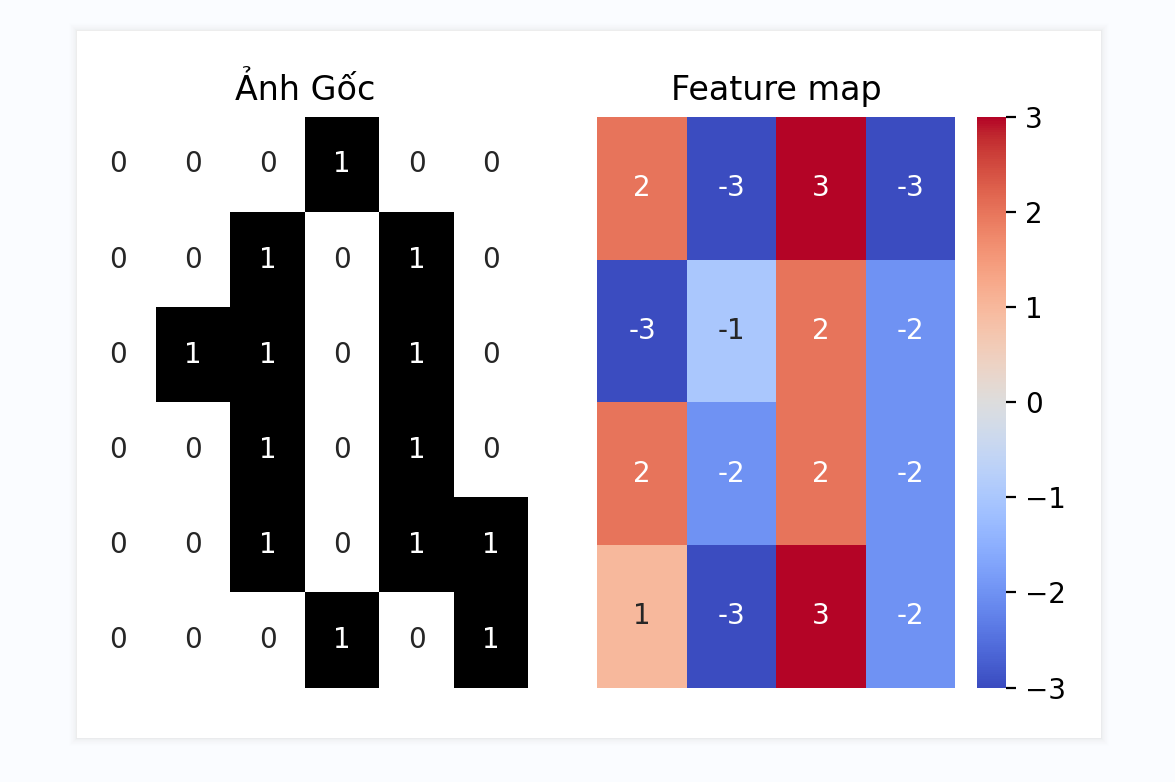

---
#### Padding và Stride
- **Padding ($P$)**: Thêm số 0 quanh ảnh để giữ kích thước đầu ra. Nếu $P=0$ (như ví dụ trên), feature map nhỏ hơn ảnh gốc.
- **Stride ($S$)**: Bước trượt của bộ lọc. Nếu $S=1$ (như ví dụ), bộ lọc trượt từng pixel một; nếu $S=2$, nó nhảy cách 2 pixel.

Công thức tính kích thước đầu ra:

$$ \text{Output Height} = \frac{H - F + 2P}{S} + 1 $$

$$ \text{Output Width} = \frac{W - F + 2P}{S} + 1 $$

- $H$, $W$: Chiều cao và chiều rộng của ảnh gốc.
- Ví dụ: Với $H=W=6$, $F=3$, $P=0$, $S=1$, ta có $\frac{6-3+0}{1}+1 = 4$, đúng với kích thước feature map $4 \times 4$.

---

### 2.2. Hàm kích hoạt (ReLU)

Sau khi có feature map từ tầng tích chập, ta dùng hàm ReLU để "lọc" nó, giữ lại các đặc trưng rõ ràng và loại bỏ những phần không quan trọng.

#### Công thức
$$ \text{ReLU}(x) = \max(0, x) $$

**Giải thích đơn giản**:
- Nếu số lớn hơn 0, giữ nguyên.
- Nếu số nhỏ hơn hoặc bằng 0, biến thành 0.

#### Ví dụ
Feature map từ số "0" ở trên:

$$ S = \begin{bmatrix} 2 & -3 & 3 & -3 \\ -3 & -1 & 2 & -2 \\ 2 & -2 & 2 & -2 \\ 1 & -3 & 3 & -2 \end{bmatrix} $$

Áp dụng ReLU:

$$ \text{ReLU}(S) = \begin{bmatrix} 2 & 0 & 3 & 0 \\ 0 & 0 & 2 & 0 \\ 2 & 0 & 2 & 0 \\ 1 & 0 & 3 & 0 \end{bmatrix} $$

**Ý nghĩa**:
- Các giá trị âm thường là những vùng không rõ đặc trưng, nên bị loại bỏ.
- Các giá trị dương là những nét chính (đường ngang), được giữ lại.

## Hình minh họa
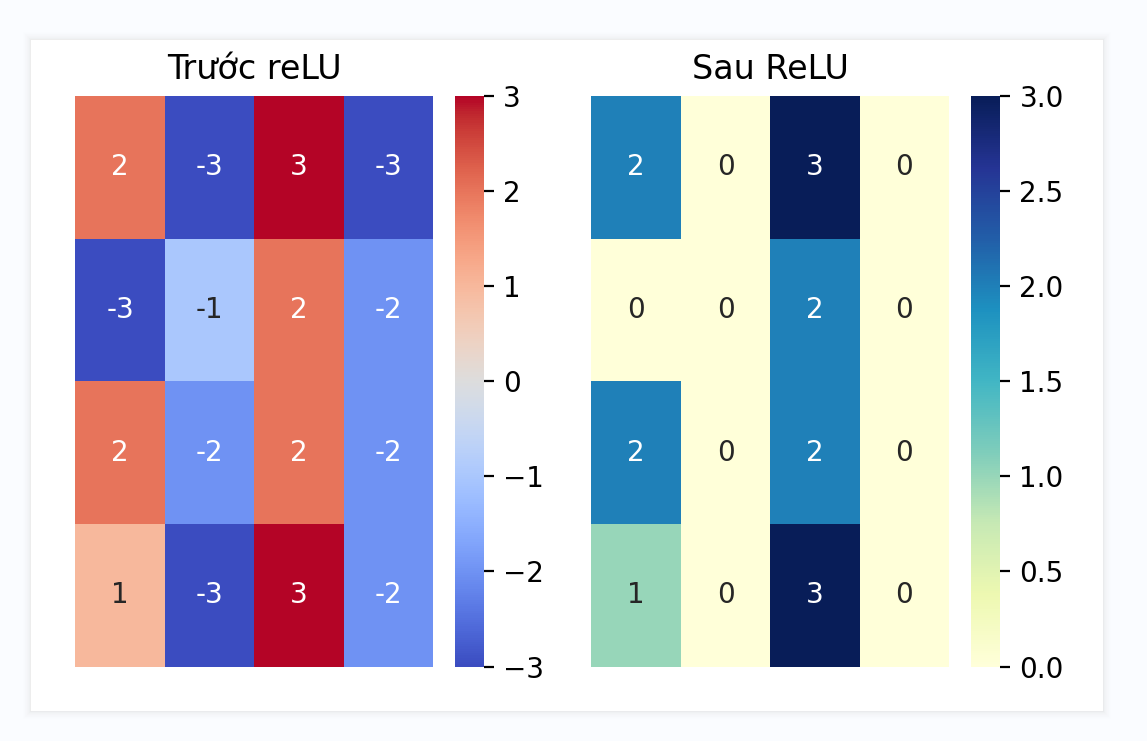

---

### 2.3. Tầng Pooling (Pooling Layer)

Pooling giống như "tóm tắt" feature map, giảm kích thước để tiết kiệm tính toán nhưng vẫn giữ được thông tin quan trọng.

#### Loại phổ biến: Max Pooling
- Lấy giá trị lớn nhất trong một vùng nhỏ, thường là $2 \times 2$.

#### Công thức
$$ P(i, j) = \max(I(2i:2i+2, 2j:2j+2)) $$

**Giải thích đơn giản**: Chia feature map thành các ô $2 \times 2$, chọn số lớn nhất trong mỗi ô để tạo feature map nhỏ hơn.

#### Ví dụ với số "0"
Lấy feature map sau ReLU:


$$ \text{ReLU}(S) = \begin{bmatrix} 2 & 0 & 3 & 0 \\ 0 & 0 & 2 & 0 \\ 2 & 0 & 2 & 0 \\ 1 & 0 & 3 & 0 \end{bmatrix} $$

Áp dụng Max Pooling với vùng $2 \times 2$, stride = 2 (các vùng không chồng lấp):
- Vùng 1 (góc trên trái): $\max(2, 0, 0, 0) = 2$
- Vùng 2 (góc trên phải): $\max(3, 0, 2, 0) = 3$
- Vùng 3 (góc dưới trái): $\max(2, 0, 1, 0) = 2$
- Vùng 4 (góc dưới phải): $\max(2, 0, 3, 0) = 3$

Kết quả feature map sau pooling:

$$ \begin{bmatrix} 2 & 3 \\ 2 & 3 \end{bmatrix} $$

**Ý nghĩa**:
- Kích thước giảm từ $4 \times 4$ xuống $2 \times 2$.
- Giữ lại các giá trị lớn (nét chính), bỏ bớt chi tiết nhỏ.
## Hình minh họa:
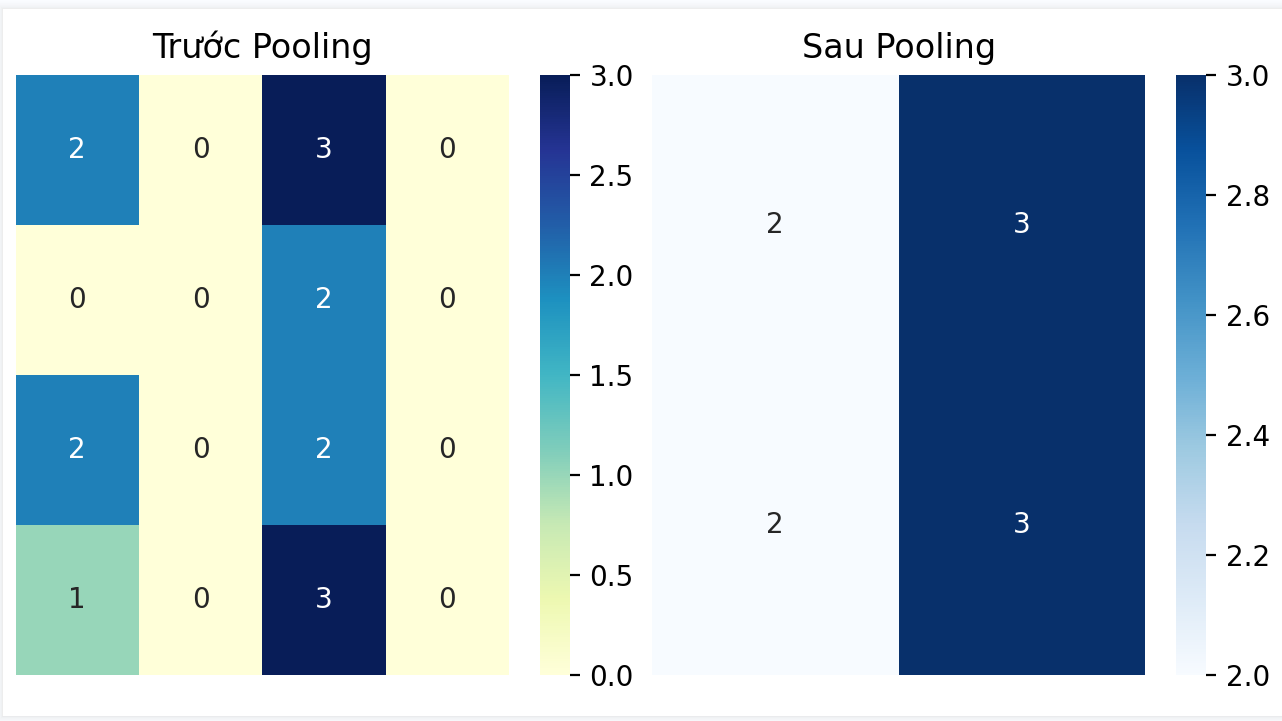
---

### 2.4. Tầng Fully Connected (FC Layer)

Đây là bước cuối cùng, nơi CNN ghép tất cả đặc trưng lại để đoán xem ảnh là gì.

#### Công thức
$$ y = Wx + b $$

- $x$: Vector từ feature map duỗi ra.
- $W$: Ma trận trọng số.
- $b$: Bias (độ lệch).

**Giải thích đơn giản**: Lấy feature map cuối, "duỗi" thành một hàng số, rồi nhân với trọng số để ra kết quả phân loại.

#### Ví dụ
Feature map sau pooling:
$$ \begin{bmatrix} 2 & 3 \\ 2 & 3 \end{bmatrix} $$

Duỗi thành vector $x = [2, 3, 2, 3]$ (4 phần tử).

Giả sử ta phân loại 2 lớp (số "0" hoặc không phải "0"), với:
- Ma trận trọng số:

$$ W = \begin{bmatrix} 0.5 & 0.2 & 0.3 & 0.4 \\ -0.1 & 0.3 & 0.2 & -0.5 \end{bmatrix} $$

- Bias:

$$ b = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} $$

Tính $y$:
- $y_0 = (0.5 \cdot 2 + 0.2 \cdot 3 + 0.3 \cdot 2 + 0.4 \cdot 3) + 0.1 = 1 + 0.6 + 0.6 + 1.2 + 0.1 = 3.5$
- $y_1 = (-0.1 \cdot 2 + 0.3 \cdot 3 + 0.2 \cdot 2 + -0.5 \cdot 3) + 0.2 = (-0.2) + 0.9 + 0.4 - 1.5 + 0.2 = -0.2$

Kết quả: $y = [3.5, -0.2]$.

**Bước cuối - Softmax**: Chuyển $y$ thành xác suất:
- $\text{Softmax}(y_0) = \frac{e^{3.5}}{e^{3.5} + e^{-0.2}} \approx 0.976$ (xác suất là "0").
- $\text{Softmax}(y_1) = \frac{e^{-0.2}}{e^{3.5} + e^{-0.2}} \approx 0.024$ (xác suất "không phải 0").

## Hình minh họa
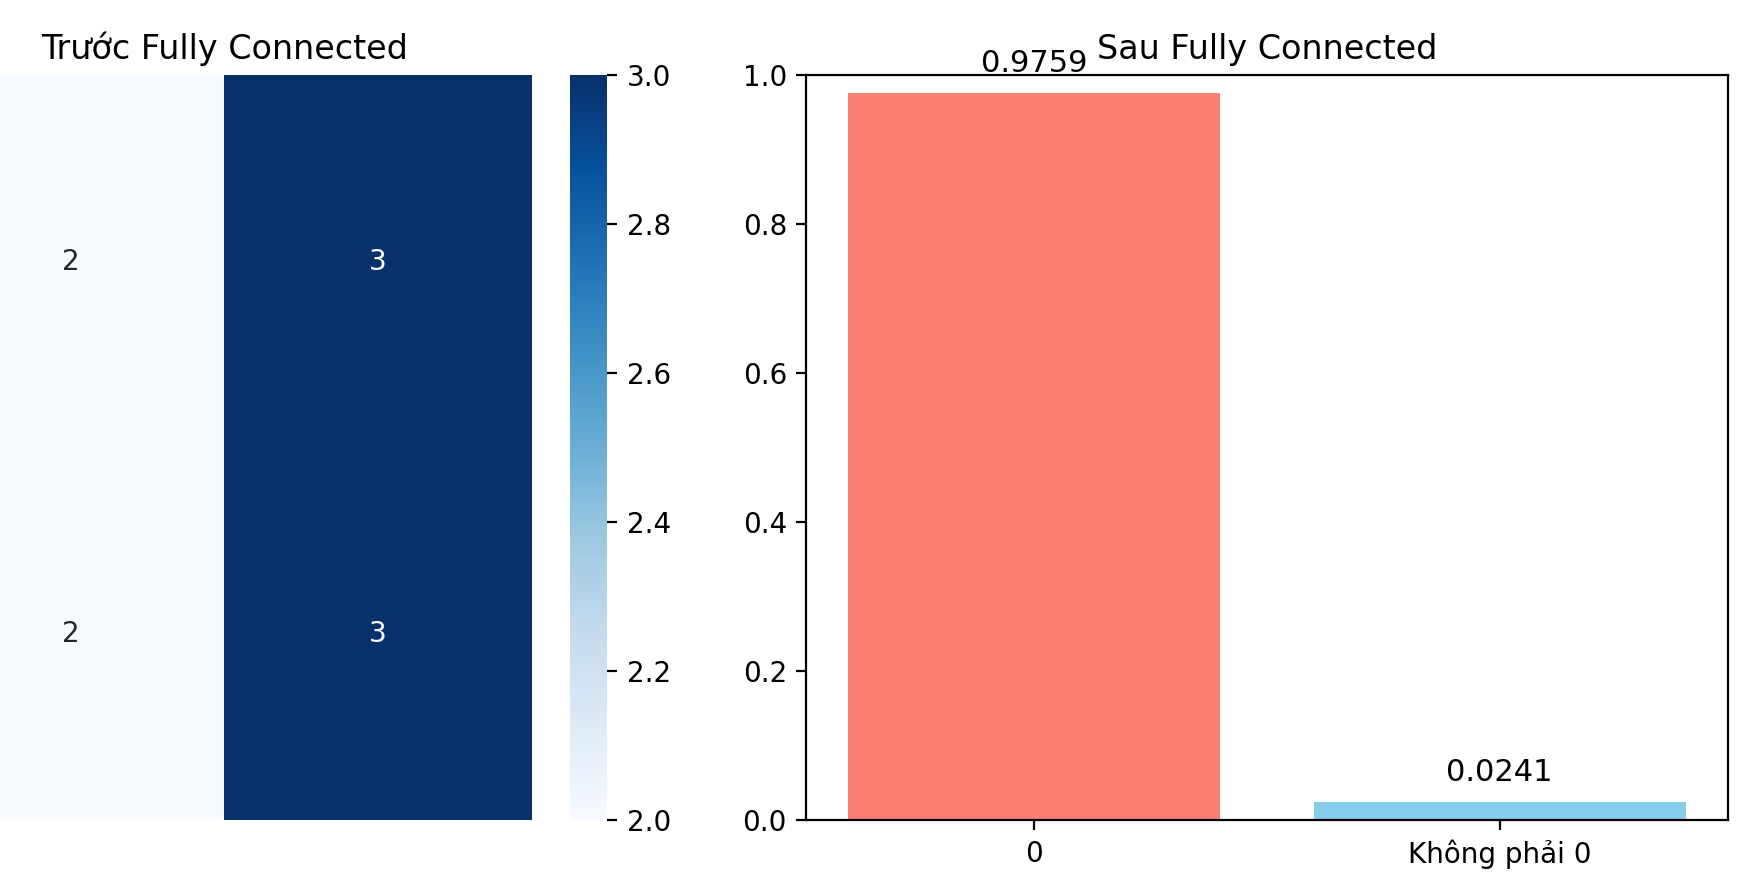

**Ý nghĩa**: Tầng này giống như "bộ não" quyết định, dựa trên các đặc trưng đã tìm được.

---

## 3. Tổng hợp lại cả quy trình CNN

Dưới đây là các bước CNN xử lý ảnh số "0", với mỗi bước dựa trên kết quả của bước trước:

1. **Tích chập**: Tìm đặc trưng như đường ngang → Feature map $S$.
2. **ReLU**: Lọc bỏ các nét mờ (giá trị âm) → Feature map $S_relu$.
3. **Pooling**: Tóm tắt, giảm kích thước → Feature map $S_pooled$.
4. **Fully Connected**: Ghép các đặc trưng, đoán xem là số "0".
Kết quả bao gồm:
- **Ảnh gốc**: Số "0" rõ ràng ($6 \times 6$).
- **Sau tích chập**: Làm nổi bật đường biên.
- **Sau ReLU**: Loại bỏ giá trị âm, giữ nét chính.
- **Sau Pooling**: Giảm kích thước, giữ nét chính.

---

## 4. Ứng dụng thực tế

CNN không chỉ nhận diện số "0" mà còn được dùng trong:
- **Nhận diện khuôn mặt**: Facebook dùng CNN để gắn thẻ bạn bè trong ảnh.
- **Xe tự lái**: Phát hiện biển báo, người đi bộ qua camera.
- **Y khoa**: Phân tích ảnh X-quang để tìm bệnh.


---
